In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams['axes.grid'] = True

In [4]:
roots = [2.2691853142129728, 2.104982167992544, 1.932307699120554, 1.749339162933206, 1.5536238493280832, 1.34187327905057, 1.109960313758399, 0.8541630993606272, 0.5762735442012712, 0.2885386111960936, 0.03198372863548067]
jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
get_crit_T = dict(zip(jds, roots))
num_temps = 100

In [5]:
def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_err(errs):
    return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

In [6]:
pred_tc = {}

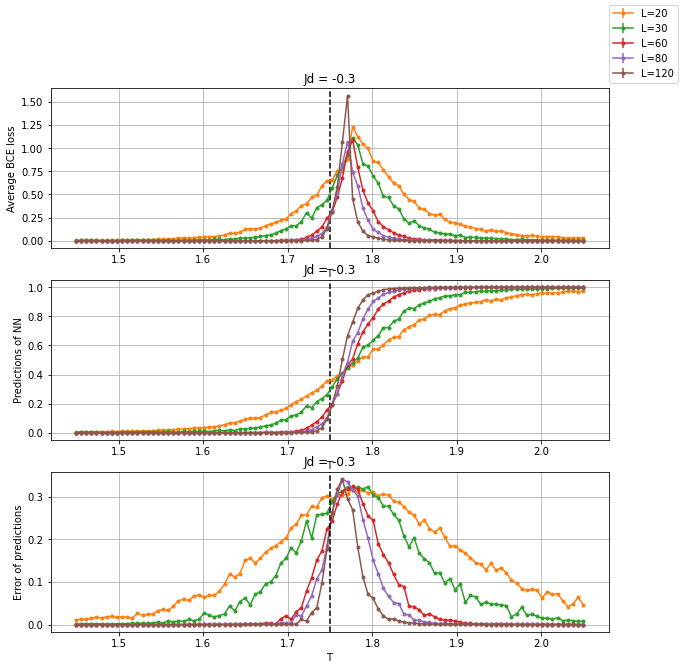

In [7]:
Jd = -0.3
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [5, 1, 3, 3, 2]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

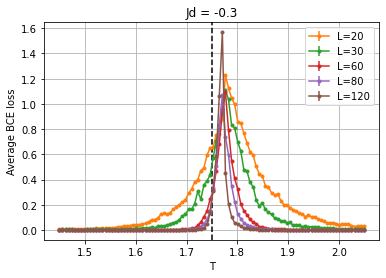

In [8]:
#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
plt.errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

'''#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4', label='L=80')
plt.errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5', label='L=120')'''

'''#ax[2].plot(T, stds_err(outs_10), marker='.')
plt.plot(T, stds_err(outs_20), marker='.', c='C1')
plt.plot(T, stds_err(outs_30), marker='.', c='C2')
plt.plot(T, stds_err(outs_60), marker='.', c='C3')
plt.plot(T, stds_err(outs_80), marker='.', c='C4')
#ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')'''

plt.axvline(x=T_c, color='black', linestyle='--')
#ax[1].axvline(x=T_c, color='black', linestyle='--')
#ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.xlabel('T')
plt.ylabel('Average BCE loss')
#plt.ylabel('Predictions of NN')
#plt.ylabel('Error of predictions')

plt.title(f'Jd = {Jd}')
plt.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.savefig(f'images/{Jd}_100_bce_opt_epoch.png', bbox_inches='tight')

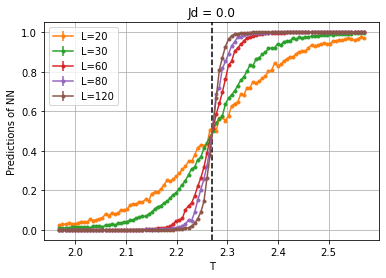

In [15]:
'''#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
plt.errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')'''

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4', label='L=80')
plt.errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5', label='L=120')

'''#ax[2].plot(T, stds_err(outs_10), marker='.')
plt.plot(T, stds_err(outs_20), marker='.', c='C1')
plt.plot(T, stds_err(outs_30), marker='.', c='C2')
plt.plot(T, stds_err(outs_60), marker='.', c='C3')
plt.plot(T, stds_err(outs_80), marker='.', c='C4')
#ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')'''

plt.axvline(x=T_c, color='black', linestyle='--')
#ax[1].axvline(x=T_c, color='black', linestyle='--')
#ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.xlabel('T')
#plt.ylabel('Average BCE loss')
plt.ylabel('Predictions of NN')
#plt.ylabel('Error of predictions')

plt.title(f'Jd = {Jd}')
plt.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.savefig(f'images/{Jd}_100_pred_opt_epoch.png', bbox_inches='tight')

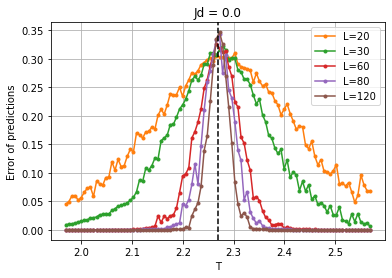

In [17]:
'''#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
plt.errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')'''

'''#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4', label='L=80')
plt.errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5', label='L=120')

'''#ax[2].plot(T, stds_err(outs_10), marker='.')
plt.plot(T, stds_err(outs_20), marker='.', c='C1', label='L=20')
plt.plot(T, stds_err(outs_30), marker='.', c='C2', label='L=30')
plt.plot(T, stds_err(outs_60), marker='.', c='C3', label='L=60')
plt.plot(T, stds_err(outs_80), marker='.', c='C4', label='L=80')
plt.plot(T, stds_err(outs_120), marker='.', c='C5', label='L=120')

plt.axvline(x=T_c, color='black', linestyle='--')
#ax[1].axvline(x=T_c, color='black', linestyle='--')
#ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.xlabel('T')
#plt.ylabel('Average BCE loss')
#plt.ylabel('Predictions of NN')
plt.ylabel('Error of predictions')

plt.title(f'Jd = {Jd}')
plt.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.savefig(f'images/{Jd}_100_err_opt_epoch.png', bbox_inches='tight')

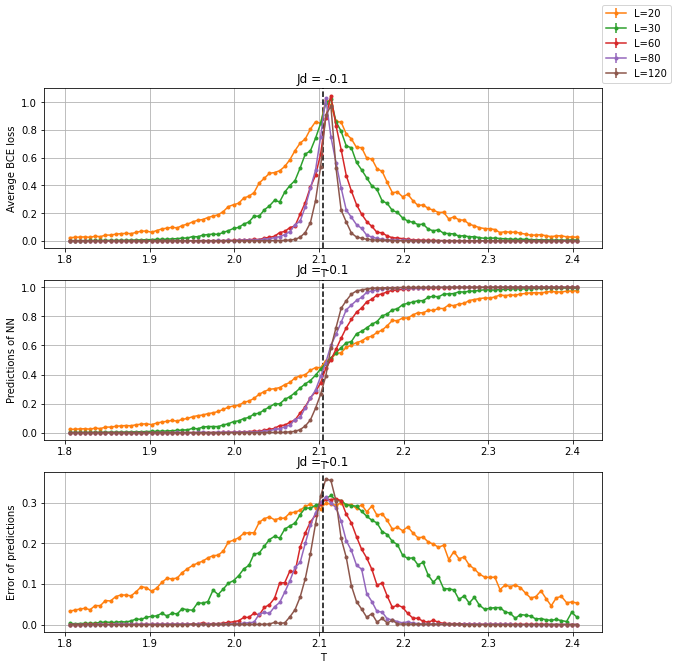

In [8]:
Jd = -0.1
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [4, 1, 3, 2, 2]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

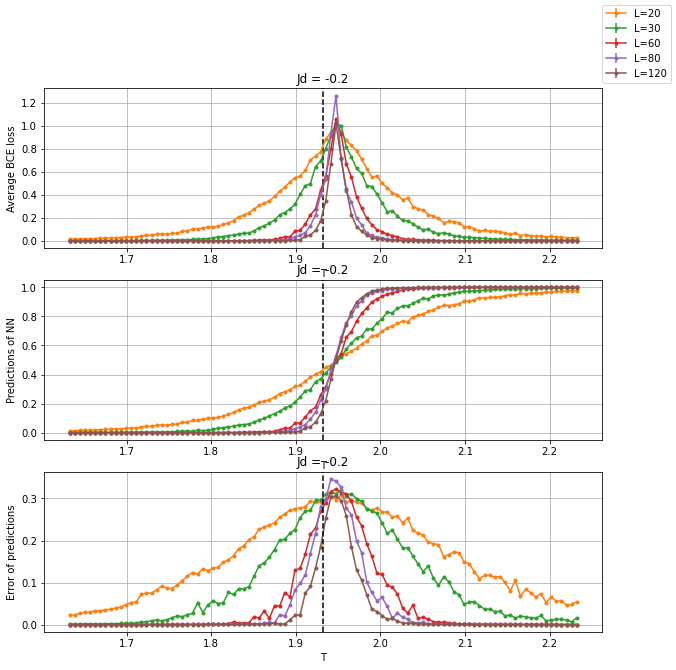

In [9]:
Jd = -0.2
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [4, 1, 3, 3, 3]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

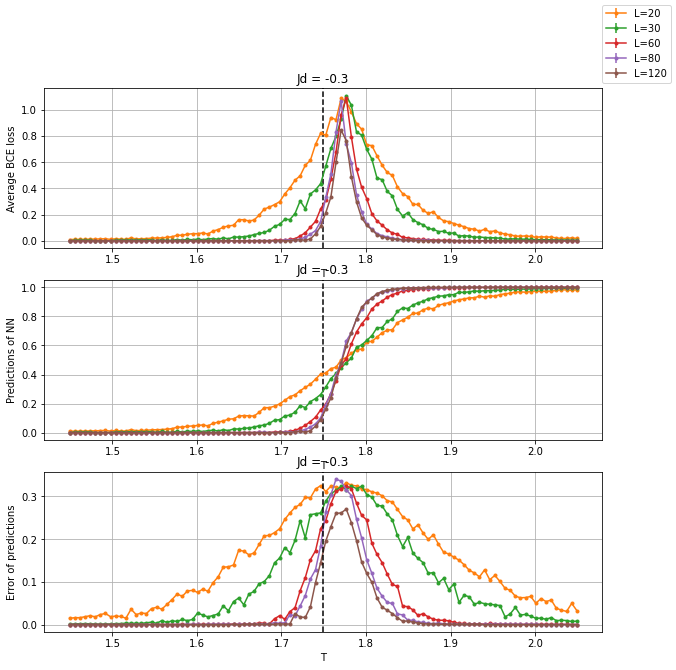

In [10]:
Jd = -0.3
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [2, 1, 3, 3, 3]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

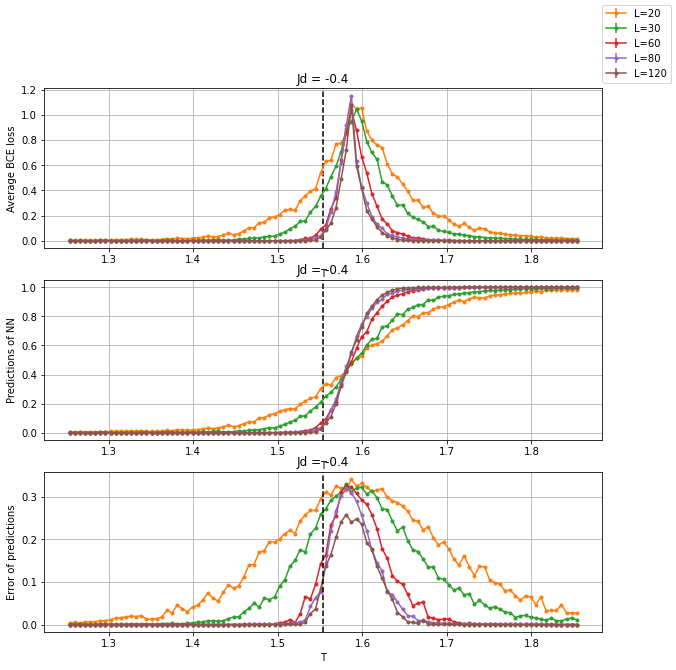

In [11]:
Jd = -0.4
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [2, 1, 6, 3, 5]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

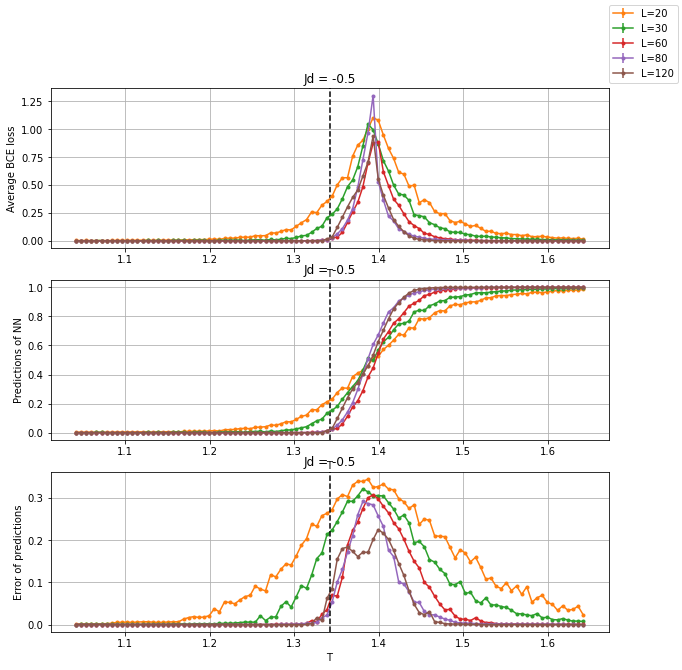

In [12]:
Jd = -0.5
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [2, 1, 4, 3, 5]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

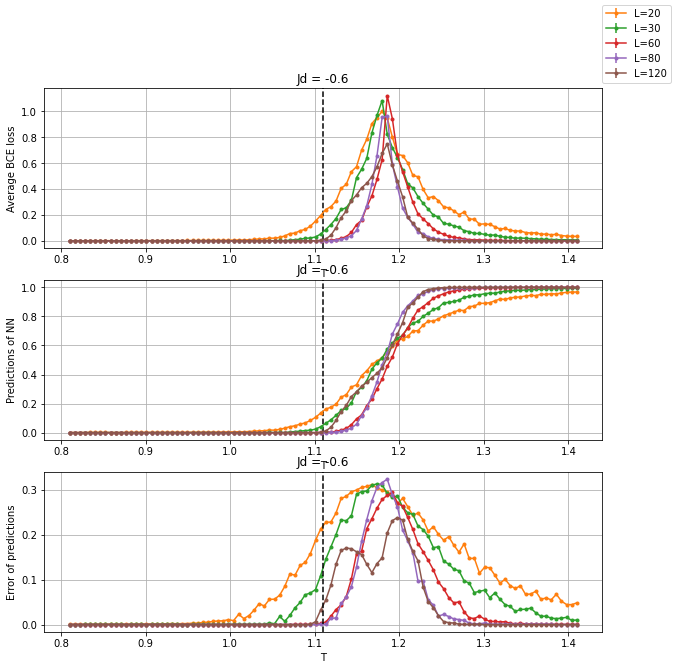

In [13]:
Jd = -0.6
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [4, 2, 4, 4, 6]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

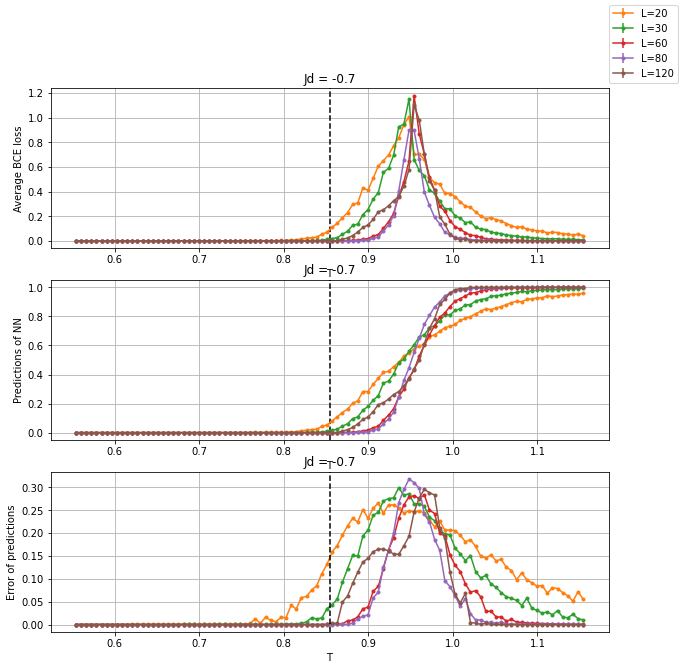

In [14]:
Jd = -0.7
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [5, 2, 4, 4, 8]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

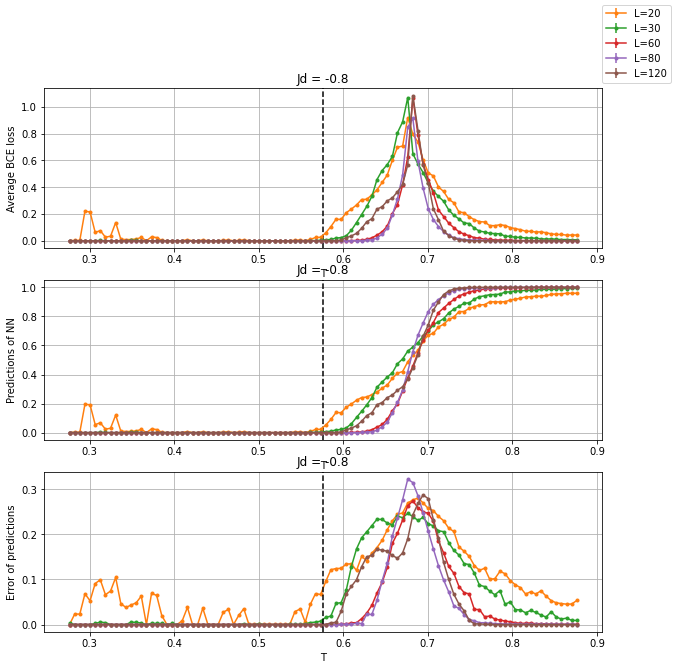

In [15]:
Jd = -0.8
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [5, 2, 4, 4, 8]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

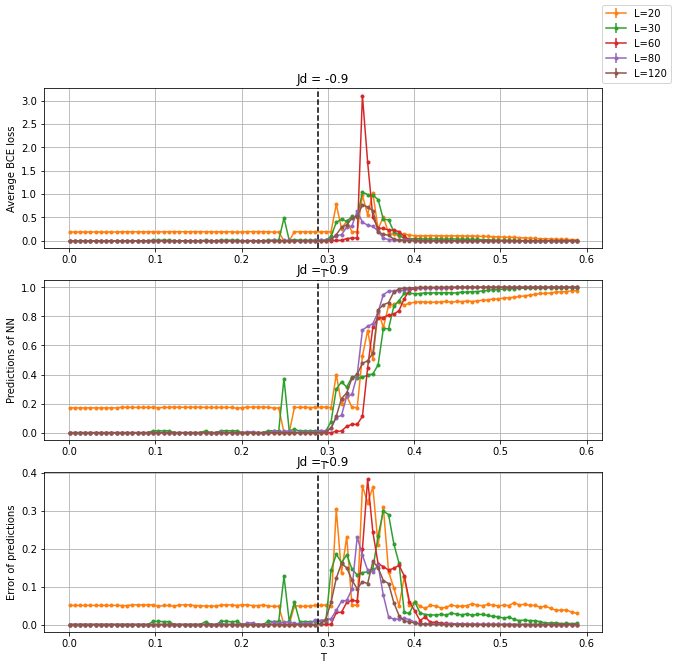

In [16]:
Jd = -0.9
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [3, 3, 6, 2, 4]
'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T[T>0], errs(errs_20)[T>0], yerr=stds_err(errs_20)[T>0]/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T[T>0], errs(errs_30)[T>0], yerr=stds_err(errs_30)[T>0]/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T[T>0], errs(errs_60)[T>0], yerr=stds_err(errs_60)[T>0]/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T[T>0], errs(errs_80)[T>0], yerr=stds_err(errs_80)[T>0]/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T[T>0], errs(errs_120)[T>0], yerr=stds_err(errs_120)[T>0]/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T[T>0], errs(outs_10)[T>0], yerr=stds_err(outs_10)[T>0]/1000, marker='.')
ax[1].errorbar(T[T>0], errs(outs_20)[T>0], yerr=stds_err(outs_20)[T>0]/1000, marker='.', c='C1')
ax[1].errorbar(T[T>0], errs(outs_30)[T>0], yerr=stds_err(outs_30)[T>0]/1000, marker='.', c='C2')
ax[1].errorbar(T[T>0], errs(outs_60)[T>0], yerr=stds_err(outs_60)[T>0]/1000, marker='.', c='C3')
ax[1].errorbar(T[T>0], errs(outs_80)[T>0], yerr=stds_err(outs_80)[T>0]/1000, marker='.', c='C4')
ax[1].errorbar(T[T>0], errs(outs_120)[T>0], yerr=stds_err(outs_120)[T>0]/1000, marker='.', c='C5')

#ax[2].plot(T[T>0], stds_err(outs_10)[T>0], marker='.')
ax[2].plot(T[T>0], stds_err(outs_20)[T>0], marker='.', c='C1')
ax[2].plot(T[T>0], stds_err(outs_30)[T>0], marker='.', c='C2')
ax[2].plot(T[T>0], stds_err(outs_60)[T>0], marker='.', c='C3')
ax[2].plot(T[T>0], stds_err(outs_80)[T>0], marker='.', c='C4')
ax[2].plot(T[T>0], stds_err(outs_120)[T>0], marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

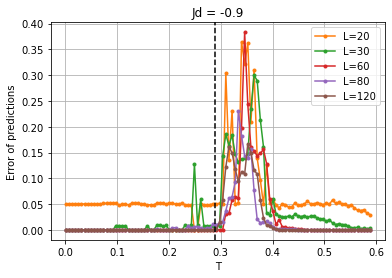

In [43]:
'''#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
plt.errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')'''

'''#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4', label='L=80')
plt.errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5', label='L=120')

'''#ax[2].plot(T, stds_err(outs_10), marker='.')
plt.plot(T[T>0], stds_err(outs_20)[T>0], marker='.', c='C1', label='L=20')
plt.plot(T[T>0], stds_err(outs_30)[T>0], marker='.', c='C2', label='L=30')
plt.plot(T[T>0], stds_err(outs_60)[T>0], marker='.', c='C3', label='L=60')
plt.plot(T[T>0], stds_err(outs_80)[T>0], marker='.', c='C4', label='L=80')
plt.plot(T[T>0], stds_err(outs_120)[T>0], marker='.', c='C5', label='L=120')

plt.axvline(x=T_c, color='black', linestyle='--')
#ax[1].axvline(x=T_c, color='black', linestyle='--')
#ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.xlabel('T')
#plt.ylabel('Average BCE loss')
#plt.ylabel('Predictions of NN')
plt.ylabel('Error of predictions')

plt.title(f'Jd = {Jd}')
plt.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.savefig(f'images/{Jd}_100_err_opt_epoch.png', bbox_inches='tight')

In [38]:
pred_tc

{0.0: 2.273427738455397,
 -0.1: 2.111648834659211,
 -0.2: 1.9474592142720693,
 -0.3: 1.774187647781691,
 -0.4: 1.589381425085659,
 -0.5: 1.3933884305657216,
 -0.6: 1.1820815258796111,
 -0.7: 0.9505267357242635,
 -0.8: 0.6799099078376349,
 -0.9: 0.34732648998397225}

In [34]:
get_crit_T[-0.9]

0.2885386111960936

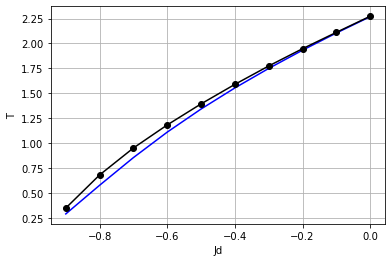

In [52]:
Jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9]

plt.figure(facecolor='white')
plt.plot(Jds, [get_crit_T[Jd] for Jd in Jds], color='blue')
plt.plot(Jds, [pred_tc[Jd] for Jd in Jds], marker='o', color='black')
#plt.axhline(y=T_c, linestyle='--', color='black')
plt.xlabel('Jd')
plt.ylabel('T')
plt.savefig(f'images_mod/tcs.png', bbox_inches='tight')

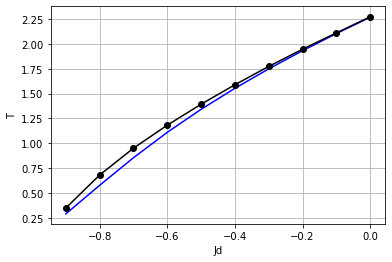

In [56]:
Jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9]

plt.figure(facecolor='white')
plt.plot(Jds, [get_crit_T[Jd] for Jd in Jds], color='blue')
plt.errorbar(Jds, [pred_tc[Jd] for Jd in Jds], yerr=T[1] - T[0], marker='o', color='black')
#plt.axhline(y=T_c, linestyle='--', color='black')
plt.xlabel('Jd')
plt.ylabel('T')
plt.savefig(f'images_mod/tcs.png', bbox_inches='tight')

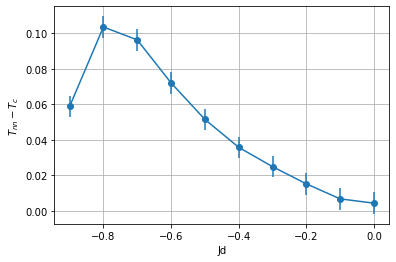

In [55]:
plt.figure(facecolor='white')
plt.errorbar(Jds, [pred_tc[Jd] - get_crit_T[Jd]  for Jd in Jds], yerr=T[1] - T[0], marker='o')
#plt.axhline(y=T_c, linestyle='--', color='black')
plt.xlabel('Jd')
plt.ylabel('$T_{nn} - T_{c}$')
plt.savefig(f'images_mod/tcs_diff.png', bbox_inches='tight')

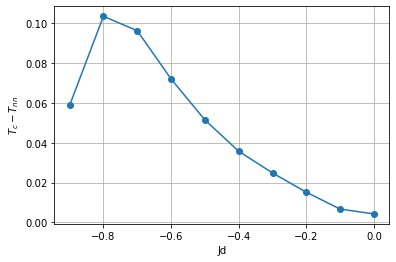

In [51]:
plt.figure(facecolor='white')
plt.plot(Jds, [np.abs(pred_tc[Jd] - get_crit_T[Jd])  for Jd in Jds], marker='o')
#plt.axhline(y=T_c, linestyle='--', color='black')
plt.xlabel('Jd')
plt.ylabel('$T_c - T_{nn}$')
plt.savefig(f'images_mod/tcs_diff.png', bbox_inches='tight')